In [1]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
torch.manual_seed(1)

In [3]:
N_SAMPLES = 20
N_HIDDEN = 300

In [4]:
# train data
x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
y = x + 0.3 * torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))
# x, y = Variable(x), Variable(y)

In [5]:
# test data
test_x = torch.unsqueeze(torch.linspace(-1, 1, N_SAMPLES), 1)
test_y = test_x + 0.3 * torch.normal(torch.zeros(N_SAMPLES, 1), torch.ones(N_SAMPLES, 1))
# test_x, test_y = Variable(test_x), Variable(test_y)

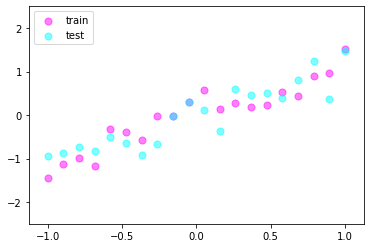

In [6]:
# show data
plt.scatter(x.data.numpy(), y.data.numpy(),
            c='magenta',
            s=50,
            alpha=0.5,
            label='train')
plt.scatter(test_x.data.numpy(), test_y.data.numpy(),
            c='cyan',
            s=50,
            alpha=0.5,
            label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5, 2.5))
plt.show()

In [7]:
net_overfitting = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1)
)

In [8]:
net_dropped = torch.nn.Sequential(
    torch.nn.Linear(1, N_HIDDEN),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, N_HIDDEN),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(N_HIDDEN, 1)
)

In [9]:
print(net_overfitting)

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): ReLU()
  (4): Linear(in_features=300, out_features=1, bias=True)
)


In [10]:
print(net_dropped)

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): Dropout(p=0.5, inplace=False)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): Dropout(p=0.5, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=300, out_features=1, bias=True)
)


In [11]:
optimizer_ofit = torch.optim.Adam(net_overfitting.parameters(), lr=0.01)
optimizer_drop = torch.optim.Adam(net_dropped.parameters(), lr=0.01)

loss_func = torch.nn.MSELoss()

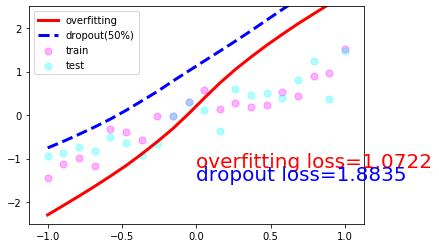

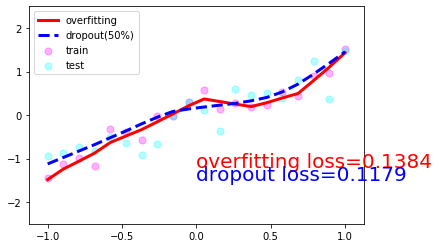

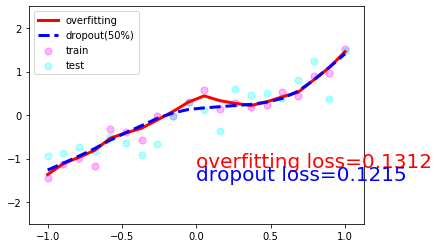

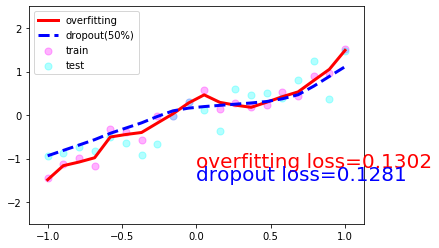

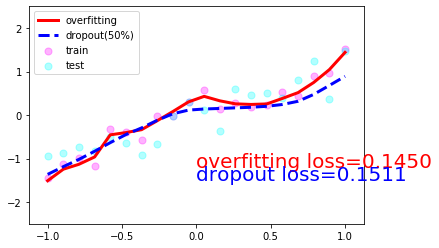

In [12]:
for t in range(500):
    pred_ofit = net_overfitting(x)
    pred_drop = net_dropped(x)
    
    loss_ofit = loss_func(pred_ofit, y)
    loss_drop = loss_func(pred_drop, y)
    
    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()
    
    loss_ofit.backward()
    loss_drop.backward()
    
    optimizer_ofit.step()
    optimizer_drop.step()
    
    if t % 100 == 0:
        # change to eval mode in order to fix drop out effect
        net_overfitting.eval()
        # 有dropout层的网络, 要有eval()
        net_dropped.eval()  # parameters for dropout differ from train mode

        # plotting
        plt.cla()
        test_pred_ofit = net_overfitting(test_x)
        test_pred_drop = net_dropped(test_x)
        plt.scatter(x.data.numpy(), y.data.numpy(),
                    c='magenta',
                    s=50,
                    alpha=0.3,
                    label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(),
                    c='cyan',
                    s=50,
                    alpha=0.3,
                    label='test')
        plt.plot(test_x.data.numpy(), test_pred_ofit.data.numpy(),
                 'r-',
                 lw=3,
                 label='overfitting')
        plt.plot(test_x.data.numpy(), test_pred_drop.data.numpy(),
                 'b--',
                 lw=3,
                 label='dropout(50%)')
        plt.text(0, -1.2, 'overfitting loss=%.4f' % loss_func(test_pred_ofit, test_y).item(),
                 fontdict={'size': 20, 'color':  'red'})
        plt.text(0, -1.5, 'dropout loss=%.4f' % loss_func(test_pred_drop, test_y).item(),
                 fontdict={'size': 20, 'color': 'blue'})
        plt.legend(loc='upper left')
        plt.ylim((-2.5, 2.5))
        plt.pause(0.1)

        # change back to train mode
        net_overfitting.train()
        net_dropped.train()
        plt.show()